In [ ]:
ecdsa-sha2-nistp256 AAAAE2VjZHNhLXNoYTItbmlzdHAyNTYAAAAIbmlzdHAyNTYAAABBBAKqyLqGL+s0DIuxPzB7HW2/wkkUu3nmVCj7oJqKc+yZ1y7X9EPcKVVnLbei+cQxSKZ7il5h3NI7Jrz1jmpGEKE= google-ssh {"userName":"seifbenmustapha8@gmail.com","expireOn":"2023-12-01T16:57:38+0000"}

In [ ]:
%load_ext autoreload

%autoreload 2

In [3]:
import os

import torch
from torch.utils.data import SubsetRandomSampler

from src.dataset import ImageDataset
from src.utils import get_indices



import numpy as np
%matplotlib inline

import model
import training
import utils

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Dataset part used for testing
TEST_SPLIT = 0.2
# Batch size for training. Limited by GPU memory
BATCH_SIZE = 3
# Dataset folder used
DATASET_USED = 'e9_5_GLM87a_cycle1_8_8'
#DATASET_USED = 'e12_5_slide7_round1_section1'
# Full Dataset path
DATASET_PATH = os.path.join('data/mip2edof_2samples', DATASET_USED)

# Training Epochs
EPOCHS = 10



## 1 Initiate train and test loader

In [4]:
image_dataset = ImageDataset(DATASET_PATH, DATASET_USED)

train_indices, test_indices = get_indices(len(image_dataset), image_dataset.root_dir, TEST_SPLIT)
train_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(test_indices)

trainloader = torch.utils.data.DataLoader(image_dataset, BATCH_SIZE, sampler=train_sampler)
testloader = torch.utils.data.DataLoader(image_dataset, 1, sampler=test_sampler)

In [5]:
testloader = torch.utils.data.DataLoader(image_dataset, 3, sampler=test_sampler)

In [7]:
len(image_dataset)

64

## 1.1 Show example of images

torch.Size([6, 1, 1024, 1024])
torch.Size([6, 1024, 1024])


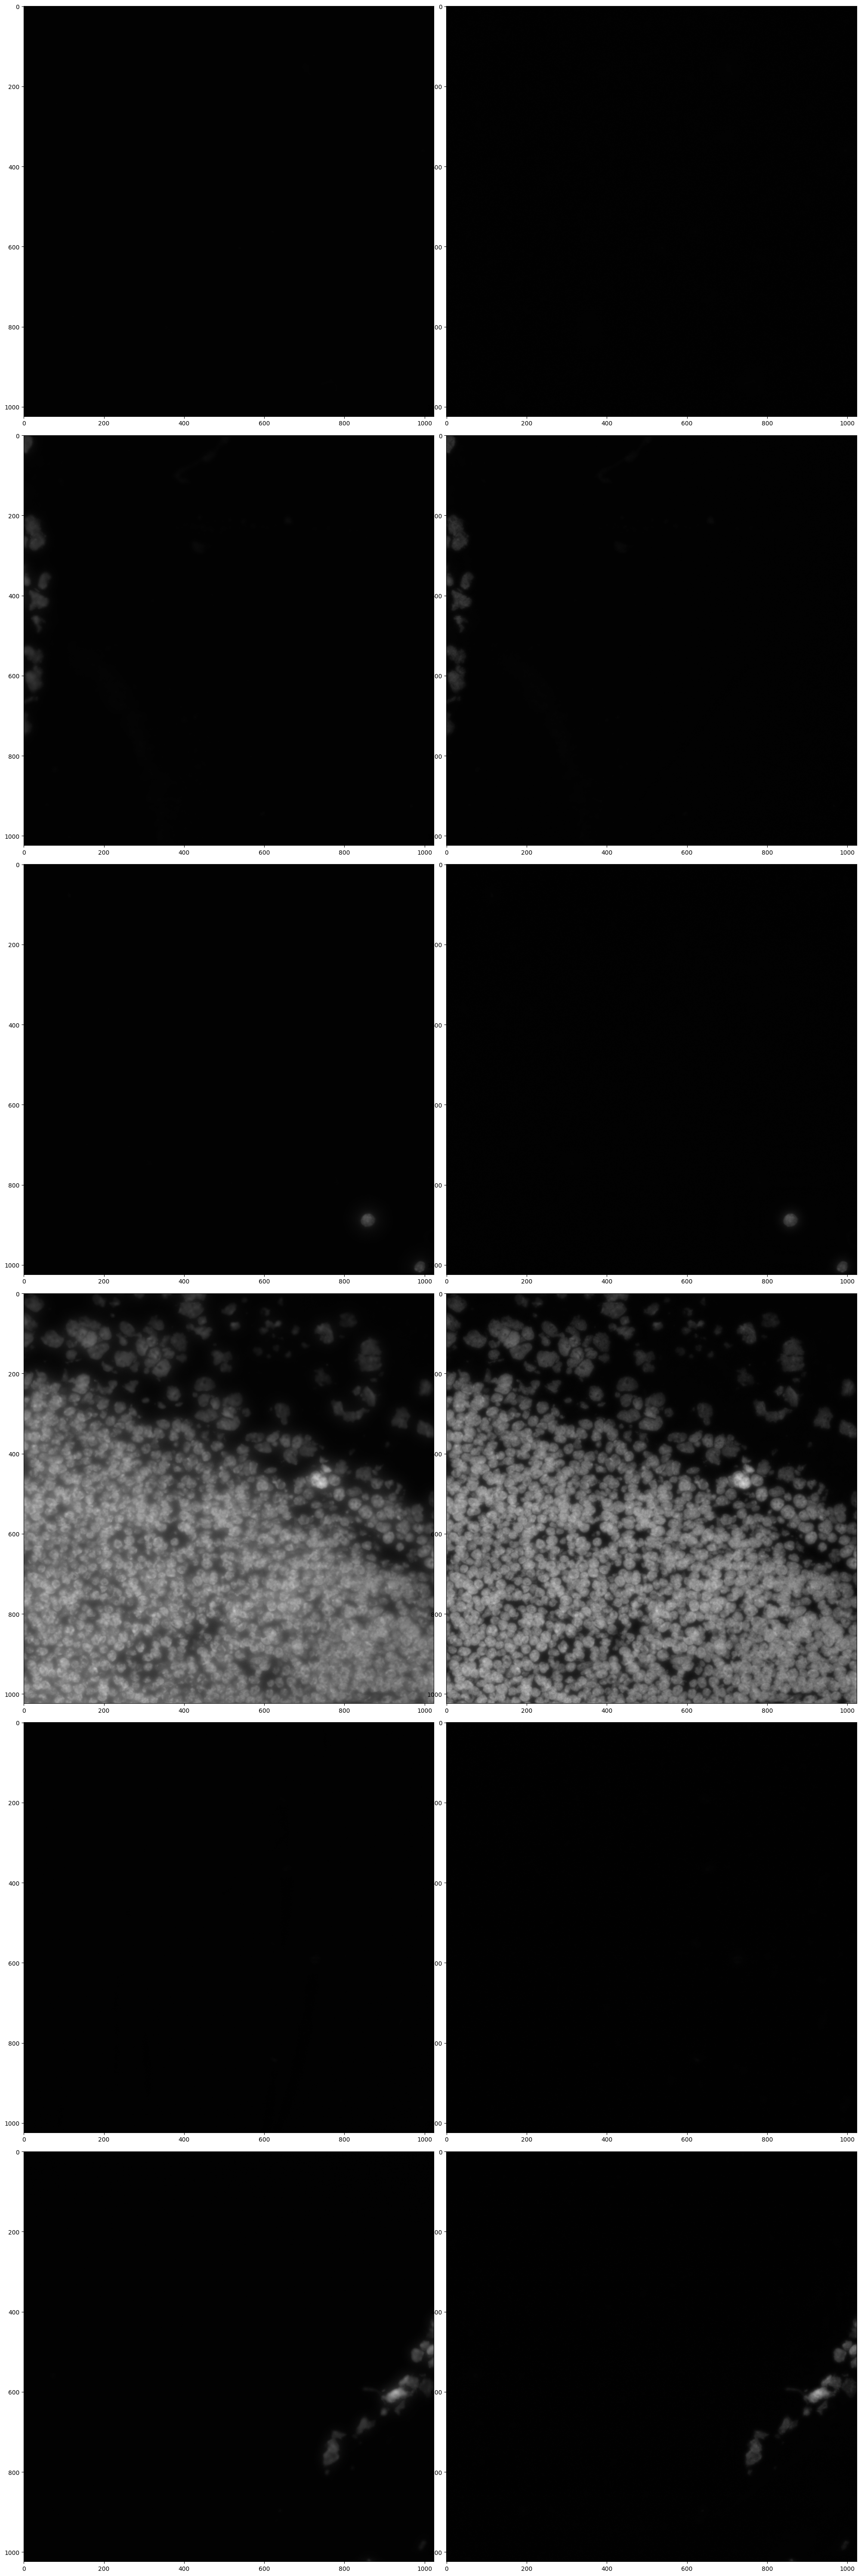

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 60))
for data in trainloader:
    print(data['input_image'].shape)
    input_image = data['input_image'].squeeze().permute(1, 2, 0)
    print(data['input_image'].squeeze().shape)
    output_image = data['output_image'].squeeze().permute(1, 2, 0)
    for i in range(input_image.shape[2]):
        ax[i,0].imshow(input_image[:,:,i], cmap='gray', vmin=0, vmax=16383, aspect='equal')
        ax[i,1].imshow(output_image[:,:,i], cmap='gray', vmin=0, vmax=16383, aspect='equal')
    break

plt.tight_layout()

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Dataset part used for testing
TEST_SPLIT = 0.2
# Batch size for training. Limited by GPU memory


# Training Epochs
EPOCHS = 13
# Filters used in UNet Model
filter_num = [16,32,64,128,256]

MODEL_NAME = f"UNet-{filter_num}.pt"

In [6]:
unet_model = model.UNet(filter_num).to(device)

# Training
unet_trainer = training.Trainer(unet_model,device)

loss_record = unet_trainer.train(EPOCHS,trainloader,mini_batch=100)

print(f'Training finished!')

In [7]:
# Training
unet_trainer = training.Trainer(unet_model,device)

loss_record = unet_trainer.train(EPOCHS,trainloader,mini_batch=1)

print(f'Training finished!')


Starting Training Process
Training finished!


In [8]:
unet_score = unet_trainer.test(testloader)

print(f'Dice Score {unet_score}')

KeyboardInterrupt: 

In [34]:
data=image_dataset.__getitem__(16)

In [35]:
image=data['input_image'].view((1, 1, 1024, 1024))

In [36]:
output=unet_trainer.model(data['input_image'].view((1, 1, 1024, 1024)))

In [37]:
 image.shape

torch.Size([1, 1, 1024, 1024])

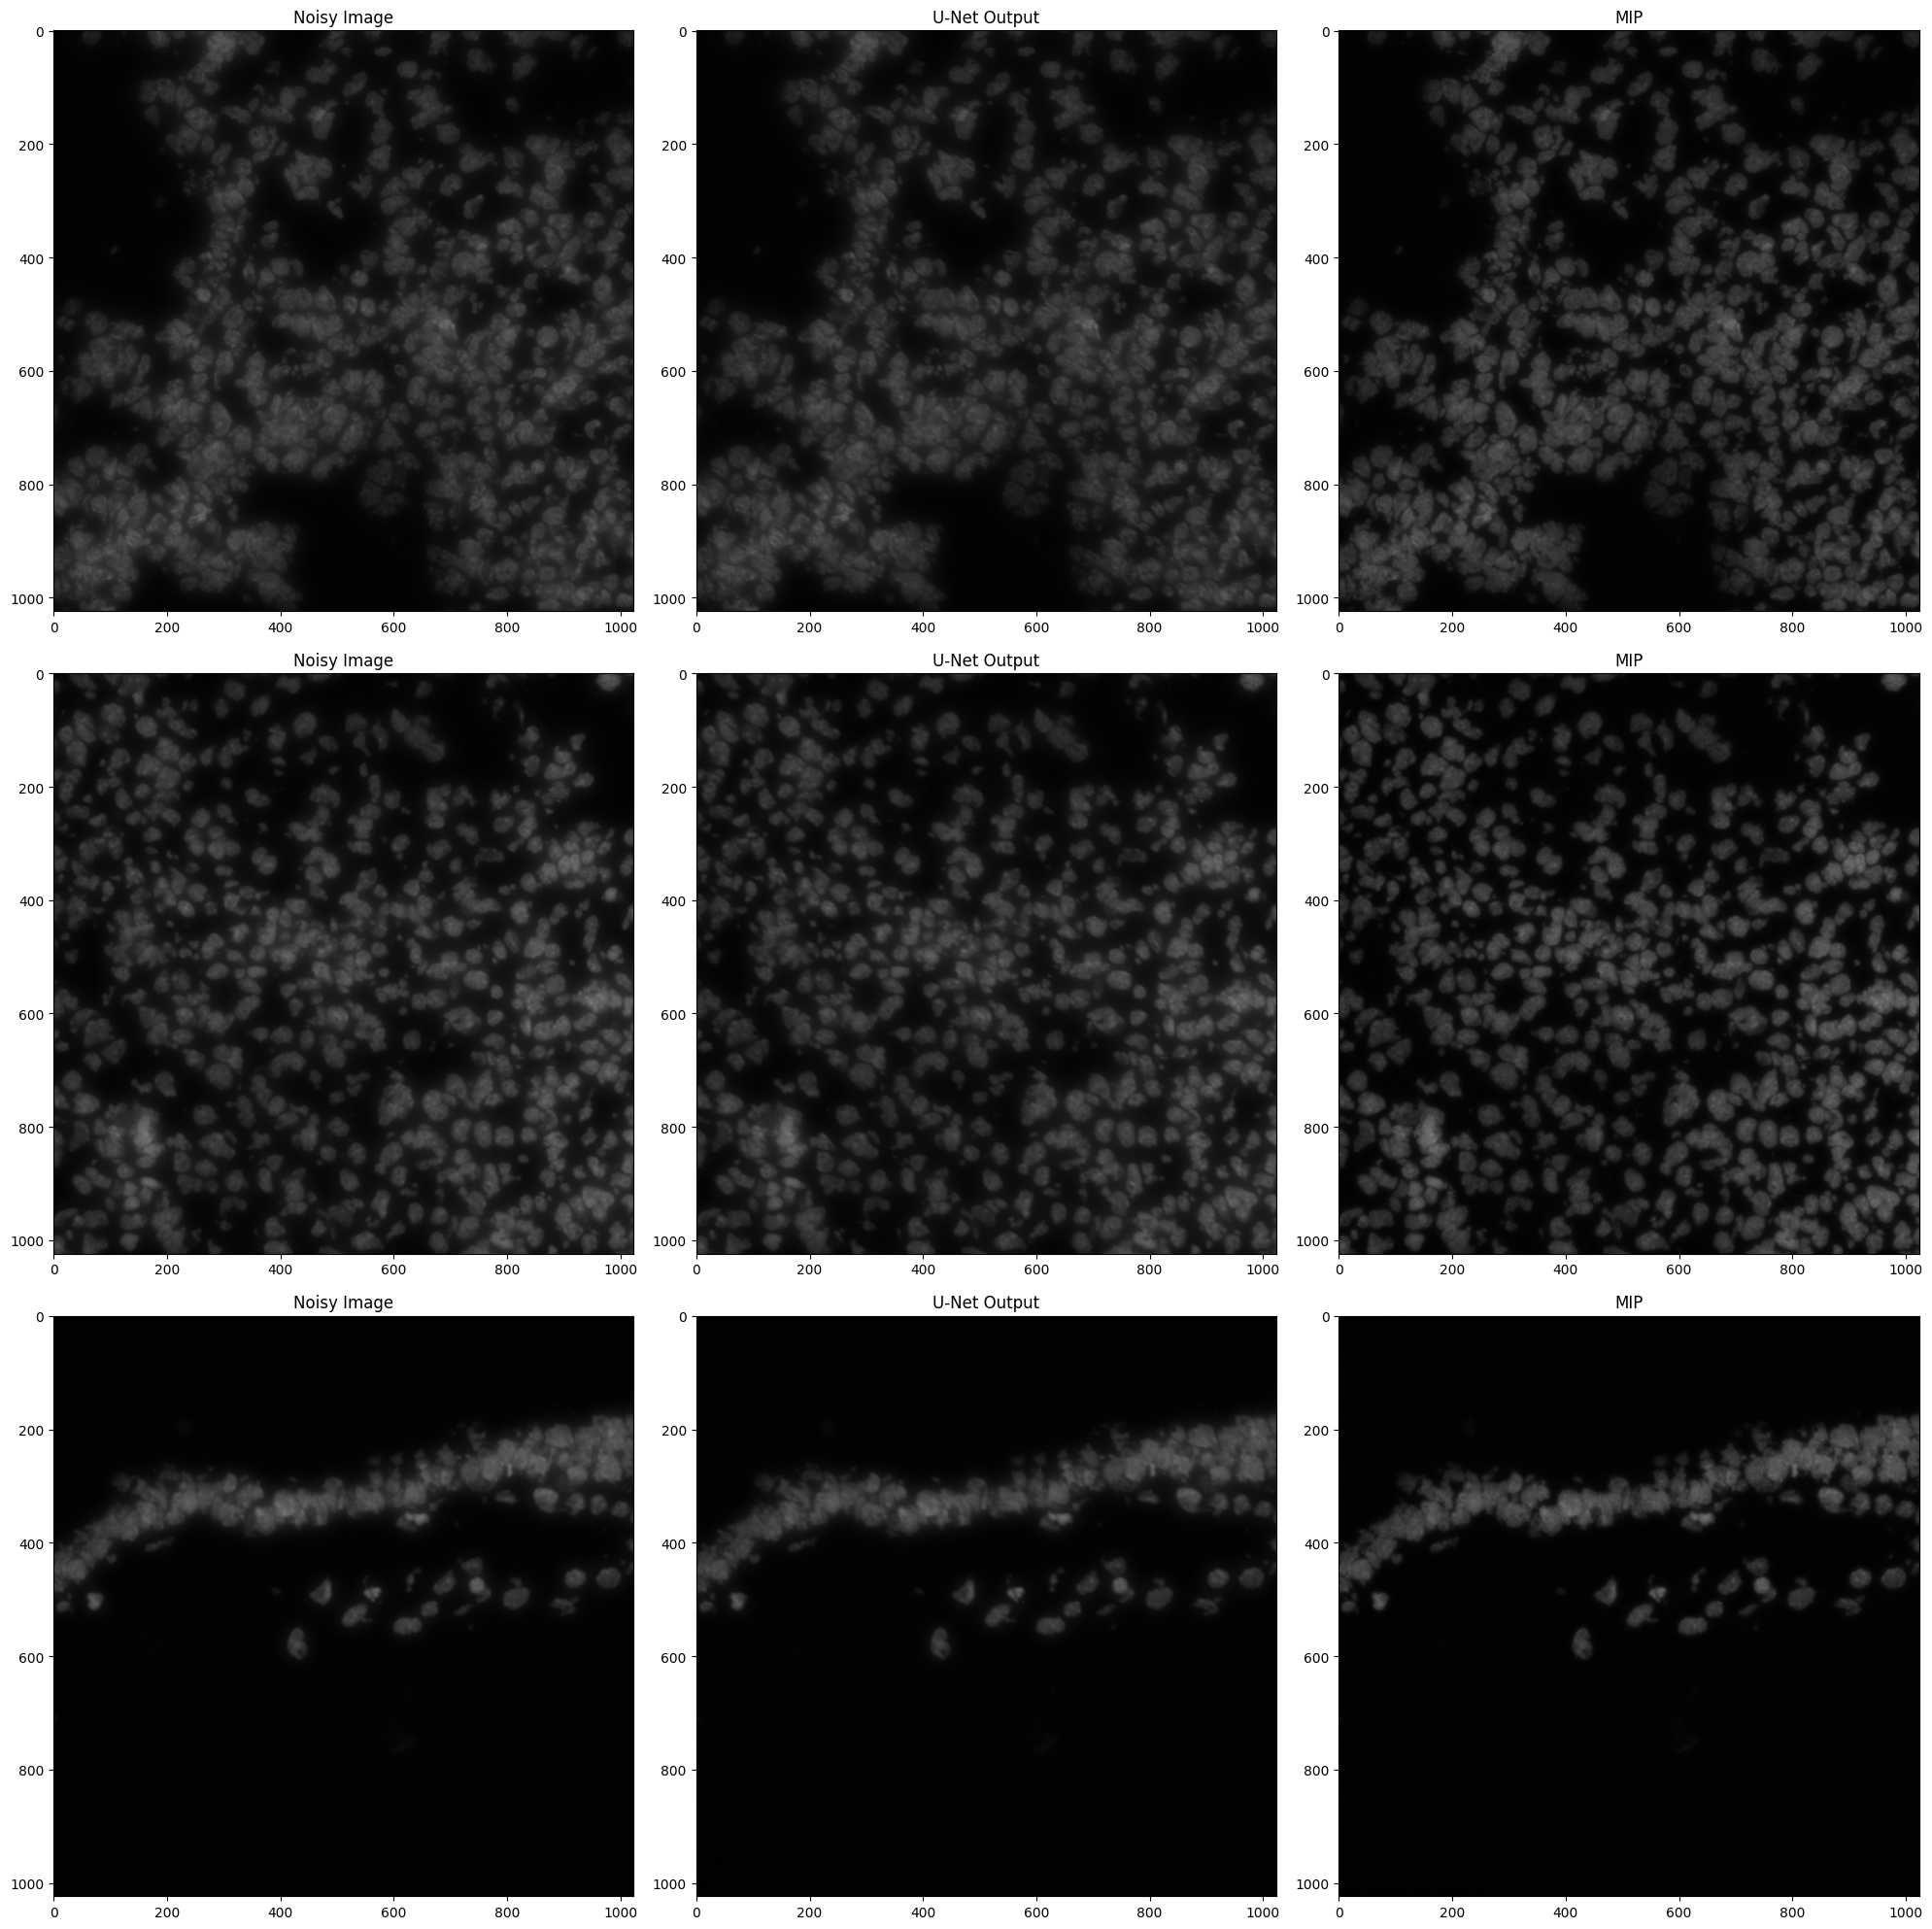

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))


for data in trainloader:
    
    output=unet_trainer.model(data['input_image'])
    input_image = data['input_image'].squeeze().permute(1, 2, 0).detach()
    output_image = data['output_image'].squeeze().permute(1, 2, 0)

    model_output=output.squeeze().permute(1, 2, 0).detach()
    
    for i in range(input_image.shape[2]):
        ax[i,0].set_title('Noisy Image')
        ax[i,1].set_title('U-Net Output')
        ax[i,2].set_title('MIP')
        ax[i,0].imshow(input_image[:,:,i], cmap='gray', vmin=0, vmax=16383, aspect='equal' )
        ax[i,1].imshow(model_output[:,:,i], cmap='gray', vmin=0, vmax=16383, aspect='equal')
        ax[i,2].imshow(output_image[:,:,i], cmap='gray', vmin=0, vmax=16383, aspect='equal')


    break

plt.tight_layout()